<a href="https://colab.research.google.com/github/akdgAkash12/Supermart-Grocery-Sales---Data-Analysis/blob/main/Supermart_Grocery_Sales_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supermart Grocery Sales –  Data Analysis Project**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
sns.set(style="whitegrid")


# Load Dataset

In [2]:
df = pd.read_csv("Retail Analytics Dataset.csv")
df.head()


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


# Explore Dataset

Shape & Columns

In [5]:
print(df.shape)
print(df.columns)


(9994, 11)
Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')


Info & Data Types

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


 Missing Values

In [6]:
df.isnull().sum()


,0
Order ID,0
Customer Name,0
Category,0
Sub Category,0
City,0
Order Date,0
Region,0
Sales,0
Discount,0
Profit,0


# Data Cleaning

Handling Missing Values

In [7]:
df = df.dropna()            # remove any incomplete rows


Convert Date Column

Most retail datasets contain "Order Date" or similar.

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed')
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

Create Profit Column (if missing)

In [15]:
if "Profit" not in df.columns:
    df["Profit"] = df["Sales"] - df["Cost"]


# Distribution of Sales

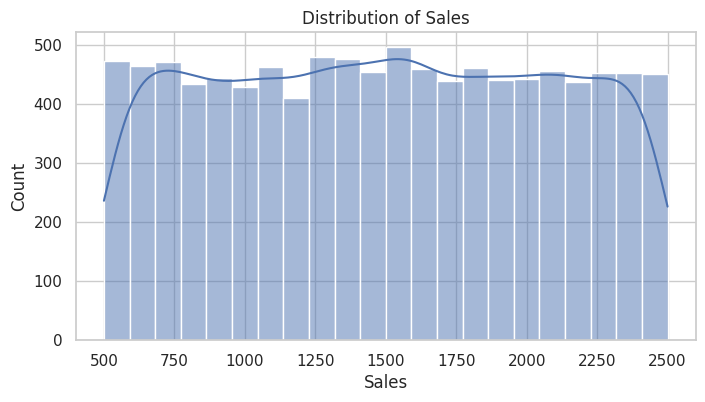

In [16]:
plt.figure(figsize=(8,4))
sns.histplot(df['Sales'], kde=True)
plt.title("Distribution of Sales")
plt.show()


# Distribution of Profit

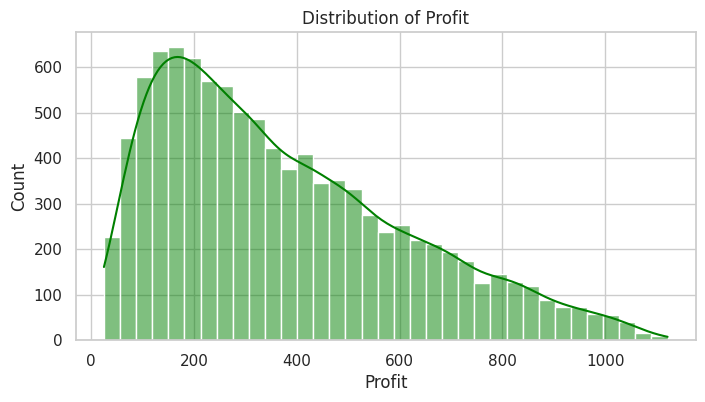

In [18]:
plt.figure(figsize=(8,4))
sns.histplot(df['Profit'], kde=True, color="green")
plt.title("Distribution of Profit")
plt.show()


Maximum profit is occured in the range of near about Rs.200

# Top Categories by Sales

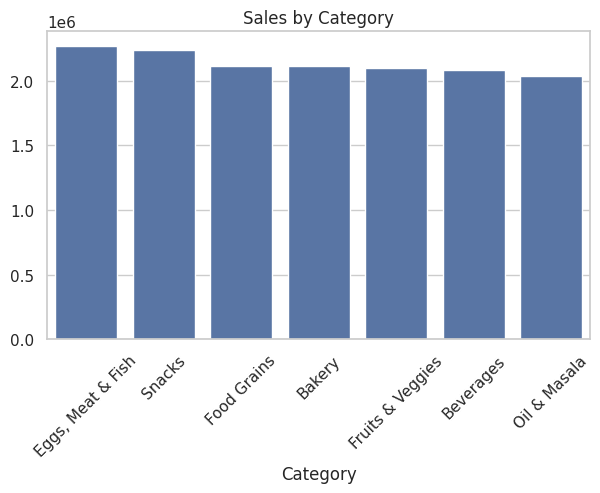

In [19]:
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Sales by Category")
plt.xticks(rotation=45)
plt.show()


From the above category distribution sales are occured homogeneously

# Top Sub-Category by Profit

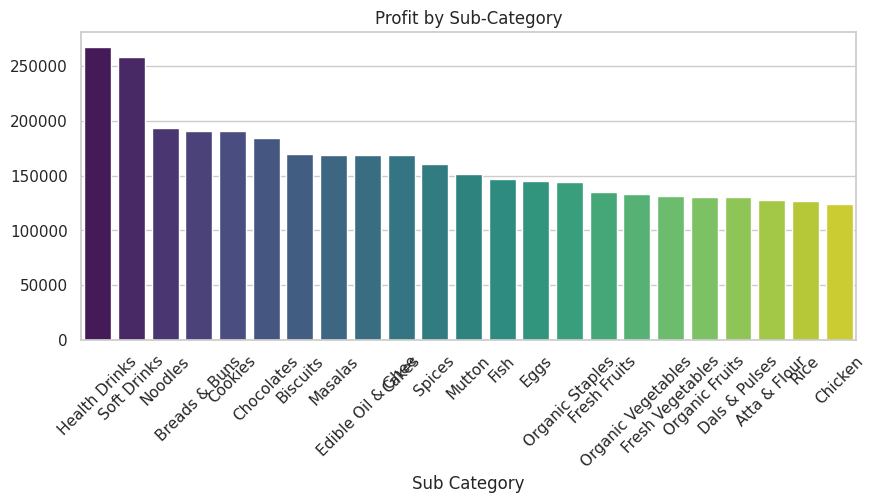

In [22]:
sub_profit = df.groupby("Sub Category")["Profit"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,4))
sns.barplot(x=sub_profit.index, y=sub_profit.values, hue=sub_profit.index, palette="viridis", legend=False)
plt.title("Profit by Sub-Category")
plt.xticks(rotation=45)
plt.show()

Maximum profit is occured in health and soft drinks

# Monthly Sales Trend

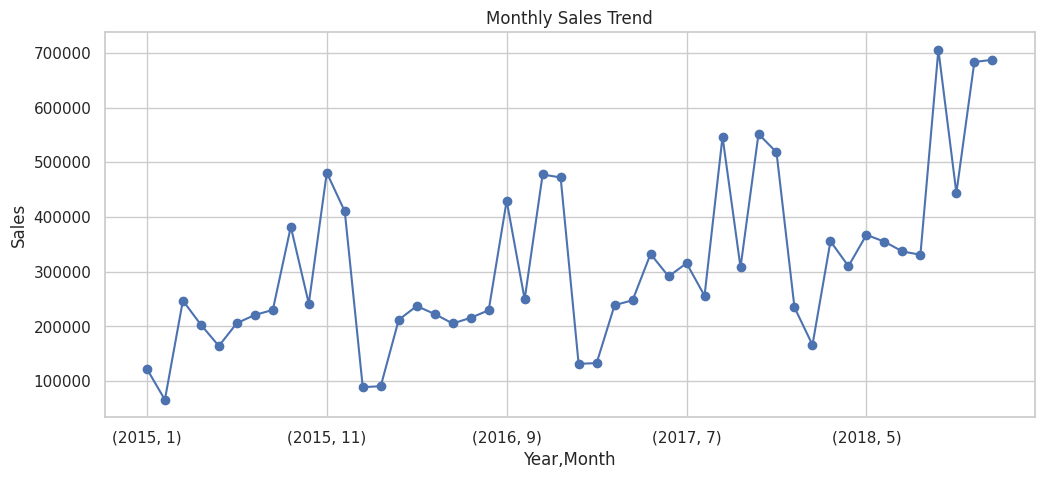

In [23]:
monthly_sales = df.groupby(["Year","Month"])["Sales"].sum()

monthly_sales.plot(figsize=(12,5), marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()


In the year end salling trend is so good.

# Top 10 Customers by Sales

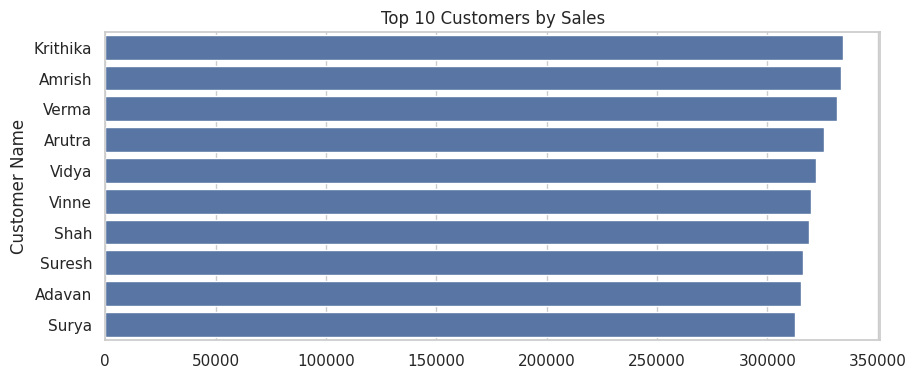

In [24]:
top_customers = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,4))
sns.barplot(y=top_customers.index, x=top_customers.values)
plt.title("Top 10 Customers by Sales")
plt.show()


# Sales by Region

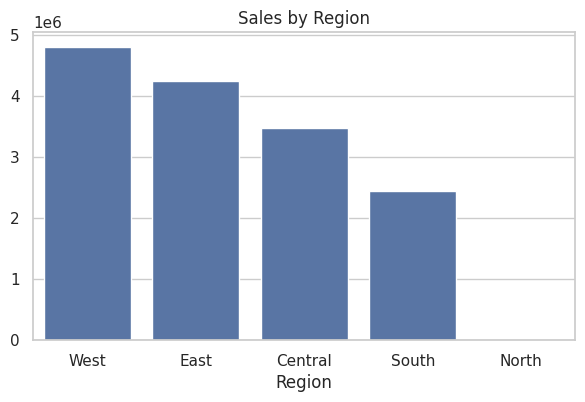

In [25]:
region_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Sales by Region")
plt.show()


# FINAL INSIGHTS



Key Findings





✔ Sales peak around Year-end months (Nov–Dec)

✔ Some products show high sales but low profit, indicating discount or supply issues

✔ Certain customer segments contribute disproportionately to profitability